In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [2]:
wine = datasets.load_wine( as_frame=True)
print(f'Atributos: {wine.feature_names}')
print(f'Classes: {wine.target_names}')
display(wine.frame)

Atributos: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Classes: ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
wine.frame.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [4]:
X,y = datasets.load_wine( return_X_y=True,)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')

X_train: (106, 13)
X_test: (72, 13)
y_train: (106,)
y_test: (72,)




---
# euclidean


In [6]:
knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))

y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 1 2 0 1 1 1 2 2 2 2 0 2 1 0 2 0 1 2 2 1 1 2 0 2 2 1 1 0 1 0 1 1 2]
0.75


In [7]:
# parâmetro k
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)

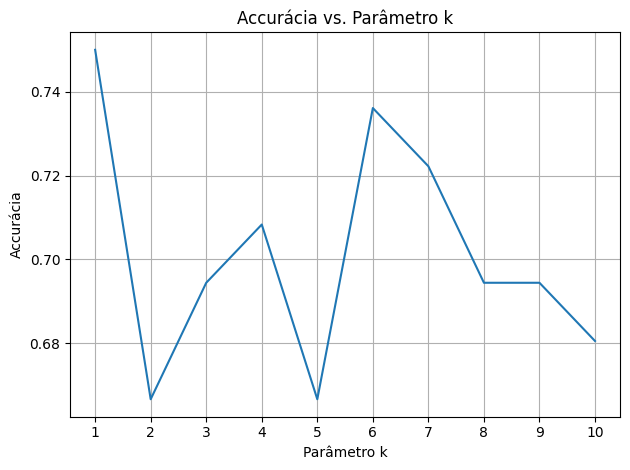

In [8]:
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
melhor_k = k_valores[acc.argmax()]
print(f'Valor de k com a melhor acurácia no conjunto de teste: {melhor_k}')

knn = KNeighborsClassifier(n_neighbors=melhor_k, metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
clr = classification_report(y_test, y_pred, target_names=wine.target_names)
print(clr)

Valor de k com a melhor acurácia no conjunto de teste: 1
              precision    recall  f1-score   support

     class_0       0.83      0.86      0.84        22
     class_1       0.78      0.81      0.79        31
     class_2       0.59      0.53      0.56        19

    accuracy                           0.75        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.74      0.75      0.75        72





---
# cityblock


In [10]:
knn = KNeighborsClassifier(n_neighbors=1, metric='cityblock')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))

y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 1 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 2 1 0 1 1 1 2 2 1 2 0 2 1 0 2 0 1 2 0 1 2 2 0 2 2 1 1 2 1 0 1 0 2]
0.7916666666666666


In [11]:
# parâmetro k
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)

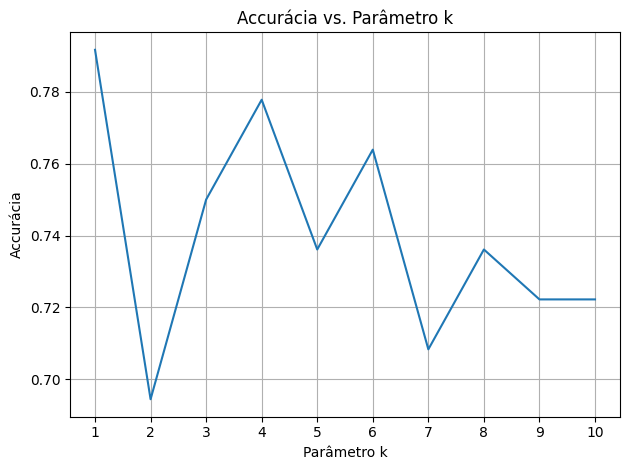

In [12]:
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
melhor_k = k_valores[acc.argmax()]
print(f'Valor de k com a melhor acurácia no conjunto de teste: {melhor_k}')

knn = KNeighborsClassifier(n_neighbors=melhor_k, metric='cityblock')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
clr = classification_report(y_test, y_pred, target_names=wine.target_names)
print(clr)

Valor de k com a melhor acurácia no conjunto de teste: 1
              precision    recall  f1-score   support

     class_0       0.83      0.86      0.84        22
     class_1       0.81      0.84      0.83        31
     class_2       0.71      0.63      0.67        19

    accuracy                           0.79        72
   macro avg       0.78      0.78      0.78        72
weighted avg       0.79      0.79      0.79        72





---
# chebyshev


In [14]:
knn = KNeighborsClassifier(n_neighbors=1, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f'y_pred={y_pred}')
print(accuracy_score(y_pred, y_test))

y_pred=[0 1 1 0 1 1 0 2 1 1 0 1 0 2 1 1 0 0 1 0 1 0 1 1 0 1 1 1 2 2 0 0 1 0 0 0 0
 1 1 1 2 0 1 1 1 2 2 2 2 0 2 2 0 2 0 1 2 2 1 1 1 0 2 2 1 1 0 1 0 1 1 2]
0.75


In [15]:
# parâmetro k
k_valores = np.arange(1, 11)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)

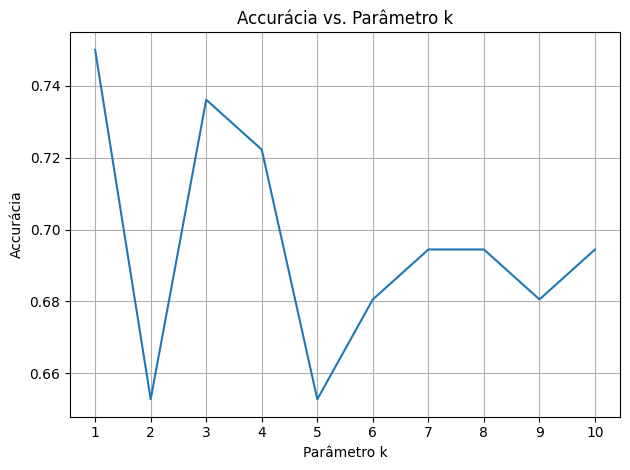

In [16]:
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Accurácia')
plt.title('Accurácia vs. Parâmetro k')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
melhor_k = k_valores[acc.argmax()]
print(f'Valor de k com a melhor acurácia no conjunto de teste: {melhor_k}')

knn = KNeighborsClassifier(n_neighbors=melhor_k, metric='chebyshev')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
clr = classification_report(y_test, y_pred, target_names=wine.target_names)
print(clr)

Valor de k com a melhor acurácia no conjunto de teste: 1
              precision    recall  f1-score   support

     class_0       0.83      0.86      0.84        22
     class_1       0.78      0.81      0.79        31
     class_2       0.59      0.53      0.56        19

    accuracy                           0.75        72
   macro avg       0.73      0.73      0.73        72
weighted avg       0.74      0.75      0.75        72





---


NORMALIZANDO OS DADOS






In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

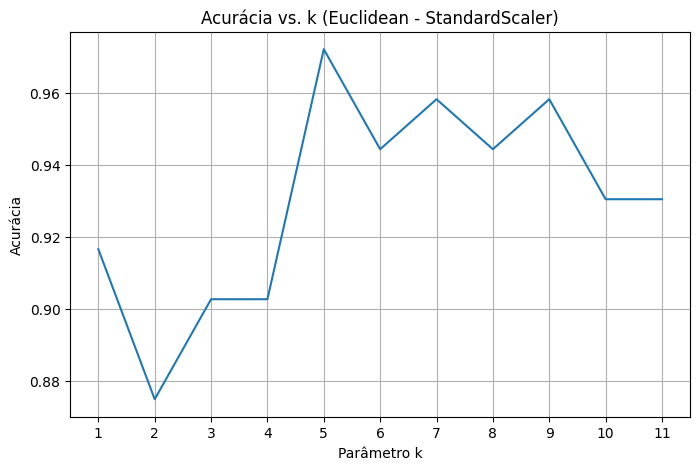

Melhor k para Euclidean: 5 com acurácia de 0.9722
Relatório de Classificação:
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        22
     class_1       1.00      0.94      0.97        31
     class_2       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72



In [19]:
k_valores = np.arange(1, 12)
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. k (Euclidean - StandardScaler)')
plt.grid(True)
plt.show()

melhor_k = k_valores[acc.argmax()]
print(f'Melhor k para Euclidean: {melhor_k} com acurácia de {acc.max():.4f}')
knn = KNeighborsClassifier(n_neighbors=melhor_k, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))


---
# cityblock

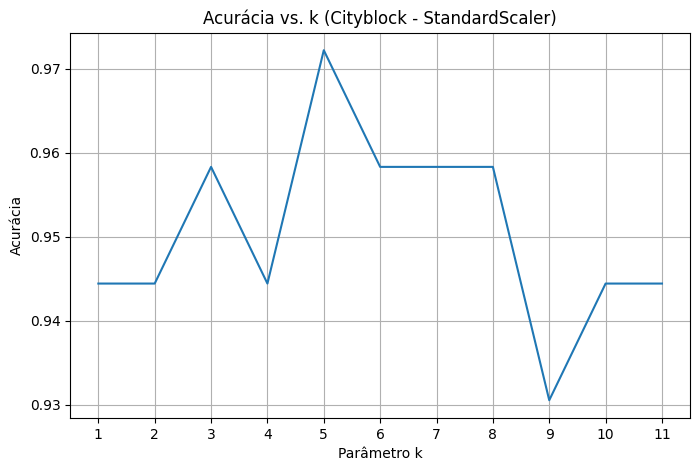

Melhor k para Cityblock: 5 com acurácia de 0.9722
Relatório de Classificação:
              precision    recall  f1-score   support

     class_0       0.96      1.00      0.98        22
     class_1       1.00      0.94      0.97        31
     class_2       0.95      1.00      0.97        19

    accuracy                           0.97        72
   macro avg       0.97      0.98      0.97        72
weighted avg       0.97      0.97      0.97        72



In [20]:
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='cityblock')
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. k (Cityblock - StandardScaler)')
plt.grid(True)
plt.show()

melhor_k = k_valores[acc.argmax()]
print(f'Melhor k para Cityblock: {melhor_k} com acurácia de {acc.max():.4f}')
knn = KNeighborsClassifier(n_neighbors=melhor_k, metric='cityblock')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))



---


CHEBYSHEV

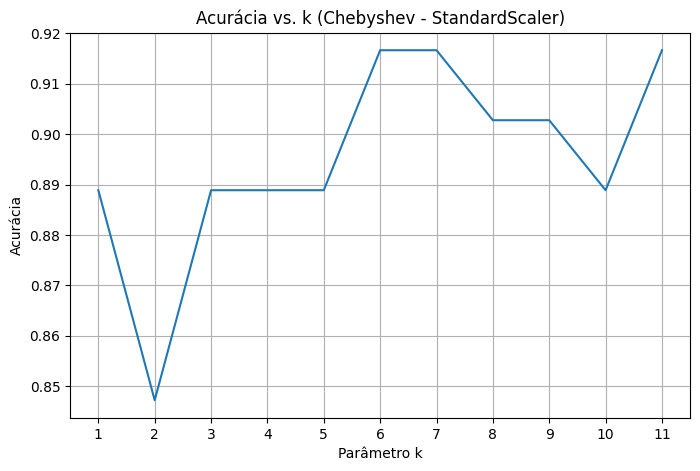

Melhor k para Chebyshev: 6 com acurácia de 0.9167
Relatório de Classificação:
              precision    recall  f1-score   support

     class_0       0.88      1.00      0.94        22
     class_1       0.96      0.84      0.90        31
     class_2       0.90      0.95      0.92        19

    accuracy                           0.92        72
   macro avg       0.91      0.93      0.92        72
weighted avg       0.92      0.92      0.92        72



In [21]:
acc = []
for k in k_valores:
  knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev')
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  acc.append(accuracy_score(y_test,y_pred))
acc = np.array(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_valores, acc)
plt.xticks(k_valores)
plt.xlabel('Parâmetro k')
plt.ylabel('Acurácia')
plt.title('Acurácia vs. k (Chebyshev - StandardScaler)')
plt.grid(True)
plt.show()

melhor_k = k_valores[acc.argmax()]
print(f'Melhor k para Chebyshev: {melhor_k} com acurácia de {acc.max():.4f}')
knn = KNeighborsClassifier(n_neighbors=melhor_k, metric='chebyshev')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))